In [1]:
import pandas as pd
import warnings 
warnings.filterwarnings('ignore')

In [2]:
reviews=pd.read_csv(r"D:\projects\Project_1\train.csv")
reviews

,User_ID,Description,Browser_Used,Device_Used,Is_Response
0,id10326,The room was kind of clean but had a VERY stro...,Edge,Mobile,not happy
1,id10327,I stayed at the Crown Plaza April -- - April -...,Internet Explorer,Mobile,not happy
2,id10328,I booked this hotel through Hotwire at the low...,Mozilla,Tablet,not happy
3,id10329,Stayed here with husband and sons on the way t...,InternetExplorer,Desktop,happy
4,id10330,My girlfriends and I stayed here to celebrate ...,Edge,Tablet,not happy
...,...,...,...,...,...
38927,id49253,We arrived late at night and walked in to a ch...,Edge,Desktop,happy
38928,id49254,The only positive impression is location and p...,InternetExplorer,Mobile,not happy
38929,id49255,Traveling with friends for shopping and a show...,Firefox,Mobile,not happy
38930,id49256,The experience was just ok. We paid extra for ...,Chrome,Desktop,not happy


In [3]:
reviews.dtypes

User_ID         object
Description     object
Browser_Used    object
Device_Used     object
Is_Response     object
dtype: object

In [4]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38932 entries, 0 to 38931
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   User_ID       38932 non-null  object
 1   Description   38932 non-null  object
 2   Browser_Used  38932 non-null  object
 3   Device_Used   38932 non-null  object
 4   Is_Response   38932 non-null  object
dtypes: object(5)
memory usage: 1.5+ MB


In [5]:
reviews.shape

(38932, 5)

In [6]:
reviews.isnull().sum()

User_ID         0
Description     0
Browser_Used    0
Device_Used     0
Is_Response     0
dtype: int64

In [7]:
reviews.head(10)

,User_ID,Description,Browser_Used,Device_Used,Is_Response
0,id10326,The room was kind of clean but had a VERY stro...,Edge,Mobile,not happy
1,id10327,I stayed at the Crown Plaza April -- - April -...,Internet Explorer,Mobile,not happy
2,id10328,I booked this hotel through Hotwire at the low...,Mozilla,Tablet,not happy
3,id10329,Stayed here with husband and sons on the way t...,InternetExplorer,Desktop,happy
4,id10330,My girlfriends and I stayed here to celebrate ...,Edge,Tablet,not happy
5,id10331,We had - rooms. One was very nice and clearly ...,InternetExplorer,Desktop,happy
6,id10332,My husband and I have stayed in this hotel a f...,Firefox,Tablet,not happy
7,id10333,My wife & I stayed in this glorious city a whi...,Google Chrome,Mobile,happy
8,id10334,My boyfriend and I stayed at the Fairmont on a...,Internet Explorer,Desktop,happy
9,id10335,"Wonderful staff, great location, but it was de...",Chrome,Tablet,not happy


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

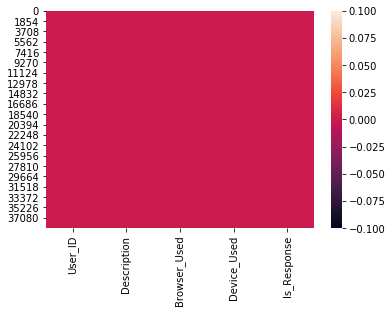

In [9]:
sns.heatmap(reviews.isnull())

Percentage for default

happy        68.12
not happy    31.88
Name: Is_Response, dtype: float64


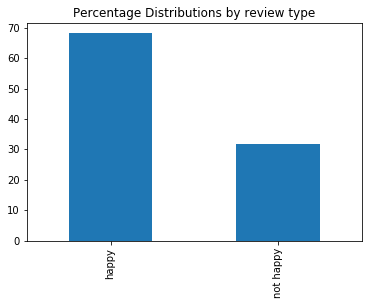

In [10]:
print("Percentage for default\n")
print(round(reviews.Is_Response.value_counts(normalize=True)*100,2))
round(reviews.Is_Response.value_counts(normalize=True)*100,2).plot(kind='bar')
plt.title("Percentage Distributions by review type")
plt.show()

In [11]:
reviews.drop(columns=["User_ID","Browser_Used","Device_Used"],inplace=True)

In [12]:
import re
import string

In [13]:
def text_clean(text):
    text=text.lower()
    text=re.sub('\[.*?\""''...]','',text)
    text=re.sub('[%s]'%re.escape(string.punctuation),'',text)
    text=re.sub('\w*\d\w*','',text)
    text=re.sub('\n','',text)
    return text

cleaned=lambda x: text_clean(x)

In [14]:
reviews['cleaned_description']=pd.DataFrame(reviews.Description.apply(cleaned))
reviews.head(10)

,Description,Is_Response,cleaned_description
0,The room was kind of clean but had a VERY stro...,not happy,the room was kind of clean but had a very stro...
1,I stayed at the Crown Plaza April -- - April -...,not happy,i stayed at the crown plaza april april th...
2,I booked this hotel through Hotwire at the low...,not happy,i booked this hotel through hotwire at the low...
3,Stayed here with husband and sons on the way t...,happy,stayed here with husband and sons on the way t...
4,My girlfriends and I stayed here to celebrate ...,not happy,my girlfriends and i stayed here to celebrate ...
5,We had - rooms. One was very nice and clearly ...,happy,we had rooms one was very nice and clearly ha...
6,My husband and I have stayed in this hotel a f...,not happy,my husband and i have stayed in this hotel a f...
7,My wife & I stayed in this glorious city a whi...,happy,my wife i stayed in this glorious city a whil...
8,My boyfriend and I stayed at the Fairmont on a...,happy,my boyfriend and i stayed at the fairmont on a...
9,"Wonderful staff, great location, but it was de...",not happy,wonderful staff great location but it was defi...


In [15]:
from sklearn.model_selection import train_test_split

In [16]:
dfx=reviews.cleaned_description
y=reviews.Is_Response

In [17]:
x_train,x_test,y_train,y_test=train_test_split(dfx,y,test_size=0.1,random_state=225)

In [32]:
!pip install tfidf

  Created wheel for tfidf: filename=tfidf-0.0.6-py3-none-any.whl size=2415 sha256=29c3b6ba29ec93e19b65932779a030f7d3765294546fb5f6bd41898d83143ca3
  Stored in directory: c:\users\parul\appdata\local\pip\cache\wheels\8b\72\4a\8d8079ffe00a3cae49d05cb28fa94f318ae97276a888e28a68
  Created wheel for etl-utils: filename=etl_utils-0.1.11-py3-none-any.whl size=21644 sha256=9569ae90c39d9101165a7bef77d1824c288f03edd8657fbeedfe727d42239f2c
  Stored in directory: c:\users\parul\appdata\local\pip\cache\wheels\f4\d1\fa\7f8f0b3bdcced0f1205bac981c449925992e5c785bfcd15dde
  Created wheel for progressbar: filename=progressbar-2.2-py3-none-any.whl size=6454 sha256=04f0bc0f04c7818075f51d8de32f89716439480f19bf31b11185edb9d5a3fb11
  Stored in directory: c:\users\parul\appdata\local\pip\cache\wheels\ed\19\57\6fd2895583ffe9b5663099963c99f4a3e3d226c6d8c1c718c0
  Created wheel for pysingleton: filename=pysingleton-0.2.1-py3-none-any.whl size=2202 sha256=2119aa85bdff400e9e24f5fd0fad957a26ee382d25a5d816ec856573b1

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

tvec=TfidfVectorizer()
lrg=LogisticRegression(solver="lbfgs")

from sklearn.pipeline import Pipeline

In [23]:
model=Pipeline([('vectorizer',tvec),('classifier',lrg)])
model.fit(x_train,y_train)

Pipeline(memory=None,
         steps=[('vectorizer',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('classifier',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, inter

In [26]:
from sklearn.metrics import confusion_matrix

In [27]:
predictions=model.predict(x_test)
confusion_matrix(predictions,y_test)

array([[2417,  305],
       [ 154, 1018]], dtype=int64)

In [28]:
from sklearn.metrics import accuracy_score,precision_score,recall_score

In [30]:
print("Accuracy: ", accuracy_score(predictions,y_test))
print("Precision: ", precision_score(predictions,y_test,average='weighted'))
print("Recall: ", recall_score(predictions,y_test,average='weighted'))

Accuracy:  0.8821263482280431
Precision:  0.8887432732018882
Recall:  0.8821263482280431


TESTING THE MODEL

In [31]:
my_reviews=pd.read_csv(r"D:\projects\Project_1\test.csv")

In [32]:
show_reviews=model.predict(my_reviews)

In [35]:
my_reviews

,User_ID,Description,Browser_Used,Device_Used
0,id80132,Looking for a motel in close proximity to TV t...,Firefox,Mobile
1,id80133,Walking distance to Madison Square Garden and ...,InternetExplorer,Desktop
2,id80134,Visited Seattle on business. Spent - nights in...,IE,Tablet
3,id80135,This hotel location is excellent and the rooms...,Edge,Mobile
4,id80136,This hotel is awesome I love the service Antho...,Mozilla,Mobile
...,...,...,...,...
29399,id109531,I stayed at the hotel and towers for a confere...,Chrome,Mobile
29400,id109532,Trying to stay within the Marriott family and ...,Internet Explorer,Tablet
29401,id109533,"We stayed for - nights with our little dog,ver...",Edge,Desktop
29402,id109534,Stayed at the Yotel over the weekend and was v...,InternetExplorer,Desktop


In [36]:
print(show_reviews)

['happy' 'not happy' 'happy' 'happy']
